In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [17]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [18]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


## Exploratory Data Analysis

In [19]:
df.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [21]:
df.bomb_planted = df.bomb_planted.astype(np.float64)

In [22]:
le = LabelEncoder()
df.map = le.fit_transform(df.map)

In [30]:
df.round_winner = le.fit_transform(df.round_winner)

In [81]:
X = df.drop(['round_winner'], axis=1)

In [32]:
y = df.round_winner

In [24]:
import seaborn as sns

<AxesSubplot:>

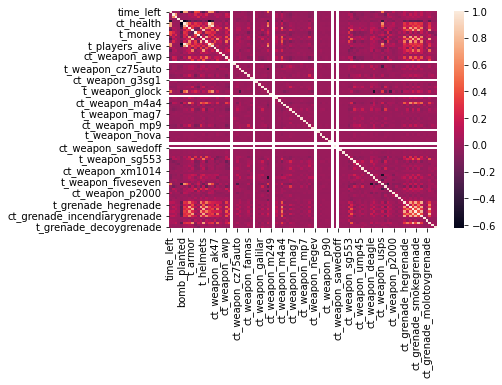

In [33]:
sns.heatmap(X.corr())

In [83]:
rs = RobustScaler()
X = rs.fit_transform(X)

In [84]:
pca = PCA(n_components=96)
pca.fit(X)

PCA(n_components=96)

In [47]:
pca.explained_variance_ratio_

array([2.41692537e-01, 1.22452193e-01, 9.70485547e-02, 5.19765524e-02,
       4.44841077e-02, 4.02770527e-02, 3.60841630e-02, 3.52728682e-02,
       2.67764081e-02, 2.44497169e-02, 2.04646466e-02, 1.79740056e-02,
       1.55168485e-02, 1.47917126e-02, 1.42711979e-02, 1.30740553e-02,
       1.24574070e-02, 1.19376720e-02, 1.10480127e-02, 1.03287101e-02,
       9.88532422e-03, 9.03168607e-03, 8.52502240e-03, 8.47584699e-03,
       7.73008304e-03, 6.79341902e-03, 6.60439673e-03, 6.24323964e-03,
       5.93567991e-03, 5.73007129e-03, 5.35247264e-03, 4.00462889e-03,
       3.89698962e-03, 3.45429363e-03, 3.29063875e-03, 3.14738676e-03,
       2.89224630e-03, 2.73424911e-03, 2.67180608e-03, 2.54714631e-03,
       2.51231332e-03, 2.37105851e-03, 2.32240981e-03, 2.13782781e-03,
       1.92297678e-03, 1.73216950e-03, 1.66688624e-03, 1.31453371e-03,
       1.26461871e-03, 1.20488990e-03, 1.17620851e-03, 1.10075710e-03,
       1.01026643e-03, 9.12115938e-04, 7.87042171e-04, 5.53660030e-04,
      

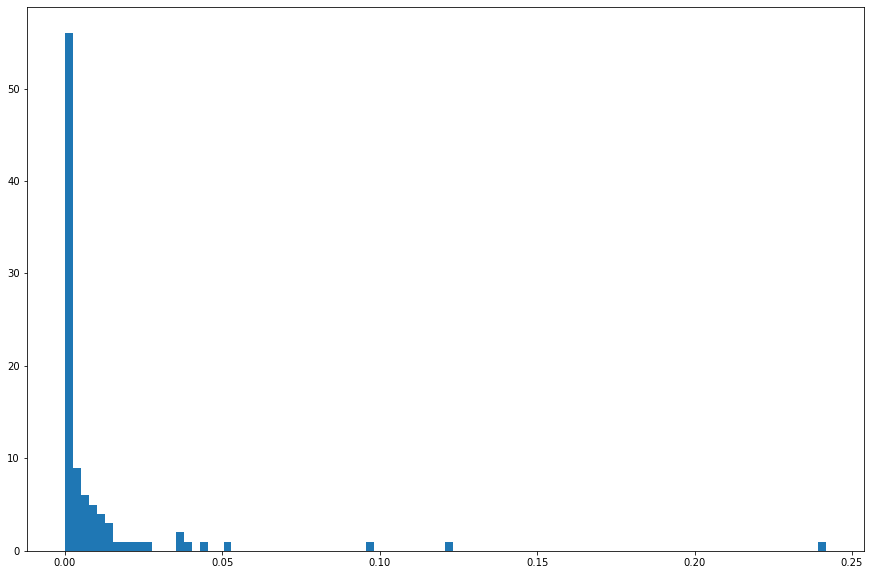

In [48]:
plt.figure(figsize=(15, 10))
plt.hist(pca.explained_variance_ratio_, bins=96)
plt.show()

In [53]:
def getKComponents(pca, alpha):
    total_variance = 0
    
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if(total_variance >= 1 - alpha):
            return feature+1
    return len(pca.explained_variance_ratio_)

In [56]:
K = getKComponents(pca, 0.1)

In [58]:
X = pca.transform(X)[:, 0:K]
X_pca = pd.DataFrame(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [71]:
LR = LogisticRegression(verbose=True)
MLPC = MLPClassifier(verbose=True)

LR.fit(X_train, y_train)
MLPC.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Iteration 1, loss = 0.49491566
Iteration 2, loss = 0.46618228
Iteration 3, loss = 0.46143835
Iteration 4, loss = 0.45867083
Iteration 5, loss = 0.45649978
Iteration 6, loss = 0.45441258
Iteration 7, loss = 0.45303737
Iteration 8, loss = 0.45146232
Iteration 9, loss = 0.45032651
Iteration 10, loss = 0.44899014
Iteration 11, loss = 0.44808188
Iteration 12, loss = 0.44682476
Iteration 13, loss = 0.44608698
Iteration 14, loss = 0.44486417
Iteration 15, loss = 0.44422390
Iteration 16, loss = 0.44314945
Iteration 17, loss = 0.44241181
Iteration 18, loss = 0.44149019
Iteration 19, loss = 0.44068118
Iteration 20, loss = 0.44010821
Iteration 21, loss = 0.43905143
Iteration 22, loss = 0.43783266
Iteration 23, loss = 0.43727200
Iteration 24, loss = 0.43649353
Iteration 25, loss = 0.43608721
Iteration 26, loss = 0.43503072
Iteration 27, loss = 0.43427925
Iteration 28, loss = 0.43340811
Iteration 29, loss = 0.43309553
Iteration 30, loss = 0.43207141
Iteration 31, loss = 0.43171575
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [72]:
print(LR.score(X_test, y_test))
print(MLPC.score(X_test, y_test))

0.7445061677967486
0.7694632791438608


## Predicting the outcome of a round with ~77% accuracy

## Trying to find the model which gives the best accuracy

In [68]:
alphas = np.arange(0.01, 0.21, 0.01)

In [85]:
lr_score = []
mlpc_score = []
def bestResults():
    for alpha in alphas:
        K = getKComponents(pca, alpha)
        X_t = pca.transform(X)[:, 0:K]
        X_pca = pd.DataFrame(X_t)
        LR = LogisticRegression()
        MLPC = MLPClassifier()
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
        LR.fit(X_train, y_train)
        MLPC.fit(X_train, y_train)
        print(f"For alpha = {alpha}")
        ls = LR.score(X_test, y_test)
        mls = MLPC.score(X_test, y_test)
        print(f"Logistic Regression Score: {ls}")
        print(f"MLPC Score: {mls}")
        print('-----------')
        lr_score.append(ls)
        mlpc_score.append(mls)
bestResults()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.01
Logistic Regression Score: 0.7489175720937832
MLPC Score: 0.7922555346785394
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.02
Logistic Regression Score: 0.7463034065844294
MLPC Score: 0.7871905890041663
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.03
Logistic Regression Score: 0.748345723388612
MLPC Score: 0.7836369577648885
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.04
Logistic Regression Score: 0.7485908014051139
MLPC Score: 0.7863328159464096
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.05
Logistic Regression Score: 0.7418511559513111
MLPC Score: 0.7792255534678539
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.060000000000000005
Logistic Regression Score: 0.7431582387059881
MLPC Score: 0.7777550853688424
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.06999999999999999
Logistic Regression Score: 0.7449554774936689
MLPC Score: 0.7745690711543175
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.08
Logistic Regression Score: 0.7432807777142391
MLPC Score: 0.7759986929172453
-----------
For alpha = 0.09
Logistic Regression Score: 0.7488767257576995
MLPC Score: 0.7695041254799444
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.09999999999999999
Logistic Regression Score: 0.7463850992565967
MLPC Score: 0.7707703618985376
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.11
Logistic Regression Score: 0.7447103994771669
MLPC Score: 0.771791520300629
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.12
Logistic Regression Score: 0.7448329384854179
MLPC Score: 0.7658688015684993
-----------
For alpha = 0.13
Logistic Regression Score: 0.7442610897802467
MLPC Score: 0.7681970427252676
-----------
For alpha = 0.14
Logistic Regression Score: 0.7475696430030226
MLPC Score: 0.7668082672984233
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.15000000000000002
Logistic Regression Score: 0.7468752552896005
MLPC Score: 0.7616207826157994
-----------
For alpha = 0.16
Logistic Regression Score: 0.7485499550690303
MLPC Score: 0.7658688015684993
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.17
Logistic Regression Score: 0.7444244751245813
MLPC Score: 0.7640715627808186
-----------
For alpha = 0.18000000000000002
Logistic Regression Score: 0.7449963238297524
MLPC Score: 0.7594559268033657
-----------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For alpha = 0.19
Logistic Regression Score: 0.7455681725349236
MLPC Score: 0.7579446123682706
-----------
For alpha = 0.2
Logistic Regression Score: 0.7513683522588024
MLPC Score: 0.7637039457560657
-----------


In [86]:
lr_score

[0.7489175720937832,
 0.7463034065844294,
 0.748345723388612,
 0.7485908014051139,
 0.7418511559513111,
 0.7431582387059881,
 0.7449554774936689,
 0.7432807777142391,
 0.7488767257576995,
 0.7463850992565967,
 0.7447103994771669,
 0.7448329384854179,
 0.7442610897802467,
 0.7475696430030226,
 0.7468752552896005,
 0.7485499550690303,
 0.7444244751245813,
 0.7449963238297524,
 0.7455681725349236,
 0.7513683522588024]

In [87]:
mlpc_score

[0.7922555346785394,
 0.7871905890041663,
 0.7836369577648885,
 0.7863328159464096,
 0.7792255534678539,
 0.7777550853688424,
 0.7745690711543175,
 0.7759986929172453,
 0.7695041254799444,
 0.7707703618985376,
 0.771791520300629,
 0.7658688015684993,
 0.7681970427252676,
 0.7668082672984233,
 0.7616207826157994,
 0.7658688015684993,
 0.7640715627808186,
 0.7594559268033657,
 0.7579446123682706,
 0.7637039457560657]

## Best Accuracy for MLPC Classifier is 79%